In [30]:
import numpy as np
import basix
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [31]:
from basix import CellType, ElementFamily, LagrangeVariant, LatticeType
import numpy as np
import matplotlib.pyplot as plt
import bbax

In [32]:
factor = 3.0
m_cm = 1/100
water = (np.array([15.2090, 24.4140]) * m_cm,
         np.array([[[5.5069 , 0.0   ],
                  [6.6227, 11.4080]],
                  [[3.4757 /factor,  0.0    /factor],
                   [3.7043 /factor,  6.7420 /factor]]]) * m_cm)

iron = (np.array([30.3110, 26.8760]) * m_cm,
        np.array([[[18.250, 0.0   ],
                   [6.4496, 21.3570]],
                  [[13.0890  /factor ,  0.0  /factor],
                   [-0.010523/factor ,7.0373 /factor]]]) * m_cm
)

void = (np.array([0.0, 0.0]),
        np.array([[[0.0, 0.0],
                   [0.0, 0.0]],
                  [[0.0, 0.0],    
                   [0.0, 0.0]]]))

source = np.array([0.097702, 0.45451])
zero_source = np.array([0.0, 0.0])

def truncate_XS(l_max):
    def truncate_XS_(xs):
        return (xs[0][:l_max+1], xs[1][:l_max+1])
    return truncate_XS_





In [33]:
[1,1,23,4][:None]

[1, 1, 23, 4]

In [ ]:

lagrange    = basix.create_element(ElementFamily.P, CellType.interval, degree= 5, lagrange_variant= LagrangeVariant.gll_warped)
N_max = 5
L_xs = 1
tr = truncate_XS(L_xs)
regions = [
    (20, *tr(water), zero_source), 
    (10, *tr(water), source ),
    (50, *tr(water), zero_source),
    (20, *tr(iron),  zero_source),
    (10, *tr(void), zero_source),
    (10, *tr(water), zero_source),
    (10, *tr(void),  zero_source)
]
elements_per_cm = 1


APN, bPN, nodes = bbax.PN.Create_PN_Matrix_From_Regions(lagrange, regions, elements_per_cm, N_max=N_max, bc = "marshak", energy_group= 0, L_scat = 0)

ADPN, bDPN, nodes = bbax.DPN.Create_DPN_Matrix_From_Regions(lagrange, regions, elements_per_cm, N_max=N_max, bc = "vacuum", energy_group= 0, L_scat= 0)

[[-5.00000000e-01  3.33333333e-02  6.76094396e-01 -2.69079151e-01
   1.49645643e-01 -8.99942209e-02]
 [-3.33333333e-02  5.00000000e-01  8.99942209e-02 -1.49645643e-01
   2.69079151e-01 -6.76094396e-01]
 [-6.76094396e-01 -8.99942209e-02  3.61689845e-16  9.55053839e-01
  -4.36316587e-01  2.47351364e-01]
 [ 2.69079151e-01  1.49645643e-01 -9.55053839e-01  2.73652628e-16
   9.72645632e-01 -4.36316587e-01]
 [-1.49645643e-01 -2.69079151e-01  4.36316587e-01 -9.72645632e-01
  -2.20309881e-16  9.55053839e-01]
 [ 8.99942209e-02  6.76094396e-01 -2.47351364e-01  4.36316587e-01
  -9.55053839e-01 -1.66533454e-15]]


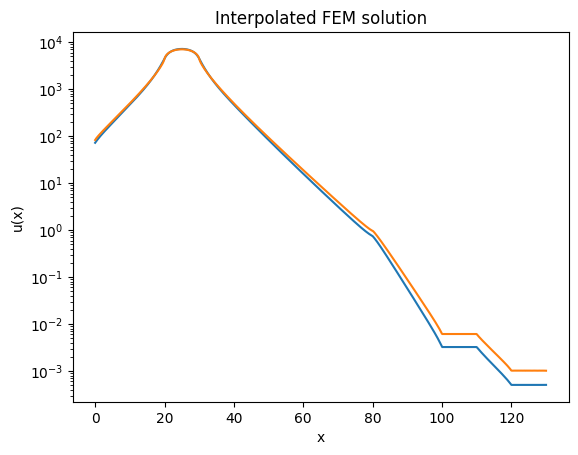

In [ ]:
import numpy as np
from scipy.sparse.linalg import spsolve, cg

import bbax.FEM1D

x = spsolve(APN.tocsr(), bPN)
elem_dofs, _ = bbax.FEM1D.create_dof_matrix_vertex_interior(lagrange, nodes)
x_plot = np.linspace(nodes[0], nodes[-1], 1000)
u_plot = bbax.PN.interpolate_PN_solution(x_plot, nodes, elem_dofs, x, lagrange, N_max)
plt.plot(x_plot, u_plot * 1e4)

x = spsolve(ADPN.tocsr(), bDPN)
elem_dofs, _ = bbax.FEM1D.create_dof_matrix_vertex_interior(lagrange, nodes)
x_plot = np.linspace(nodes[0], nodes[-1], 1000)
u_plot = 0.5 * (bbax.DPN.interpolate_DPN_solution(x_plot, nodes, elem_dofs, x, lagrange, N_max, 0, -1) + bbax.DPN.interpolate_DPN_solution(x_plot, nodes, elem_dofs, x, lagrange, N_max, 0, 1))

plt.plot(x_plot, u_plot * 1e4)
plt.xlabel("x")
plt.ylabel("u(x)")
plt.title("Interpolated FEM solution")
plt.yscale('log')

In [36]:
plt.figure(figsize=(10, 10))
plt.spy(A, markersize=1)

NameError: name 'A' is not defined

<Figure size 1000x1000 with 0 Axes>